## Simulates the Hanle effect for a two-level system

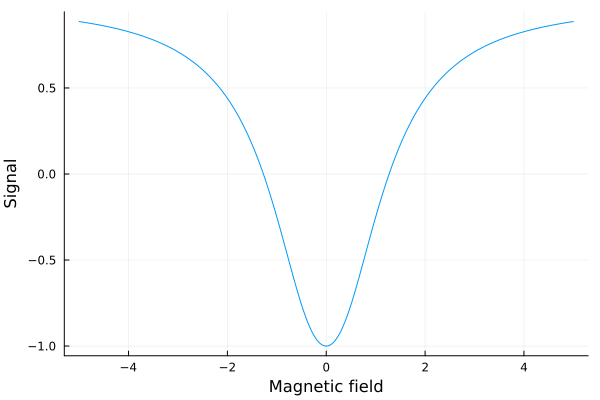

In [10]:
using Plots

# Constants
γ = 1.0
Ω = 1.0

# Hanle effect simulation function
function hanle_effect(B, N=1000)
    # Define magnetic field range
    Bmax = 5
    Bmin = -5
    Bvals = range(Bmin, stop=Bmax, length=N)

    # Define polarization vector
    P = [0, 0, 1]

    # Initialize signal vector
    S = zeros(N)

    # Calculate signal for each magnetic field
    for (i, Bval) in enumerate(Bvals)
        # Calculate Zeeman splitting
        ΔE = γ * Bval

        # Calculate polarization rotation
        θ = atan(Ω / ΔE)
        R = [cos(θ)^2+(1-cos(θ)^2)*P[1]   cos(θ)*(1-cos(θ))*P[2]-sin(θ)*P[3]   cos(θ)*(1-cos(θ))*P[3]+sin(θ)*P[2];
             cos(θ)*(1-cos(θ))*P[2]+sin(θ)*P[3]   cos(θ)^2+(1-cos(θ)^2)*P[2]   cos(θ)*(1-cos(θ))*P[1]-sin(θ)*P[3];
             cos(θ)*(1-cos(θ))*P[3]-sin(θ)*P[2]   cos(θ)*(1-cos(θ))*P[1]+sin(θ)*P[3]   cos(θ)^2+(1-cos(θ)^2)*P[3]]

        # Calculate signal
        S[i] = abs(R[1, 1])^2 - abs(R[2, 1])^2
    end

    # Plot signal vs. magnetic field
    plot(Bvals, S, xlabel="Magnetic field", ylabel="Signal", legend=false)
end

# Example usage
hanle_effect(1.0)


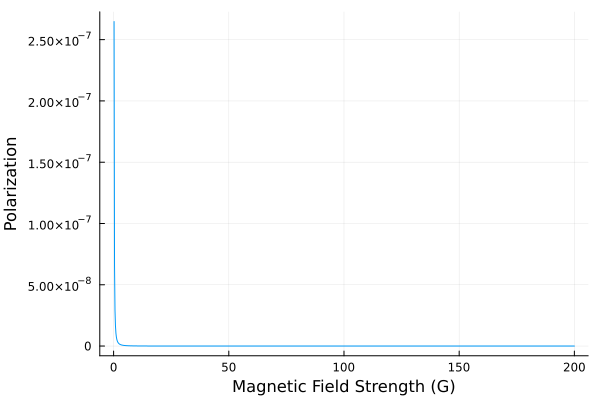

In [13]:
using Plots

# Define constants
μB = 9.274e-24 # Bohr magneton in J/T
kB = 1.381e-23 # Boltzmann constant in J/K
h = 6.626e-34 # Planck constant in J s
c = 2.998e8 # speed of light in m/s

# Define the Hanle function
function hanle(B, g, λ)
    ξ = (g * μB * B) / (h * c * λ)
    return (3 / (2 * ξ^2)) * (1 - (2 / (2 + ξ^2)) * exp(-2 * ξ^2))
end

# Set up the parameters
g = 1.5 # Landé g-factor
λ = 589e-9 # wavelength of light in meters
T = 300 # temperature in Kelvin

# Define the magnetic field range
B_range = range(0, stop=2e-2, length=1000) # magnetic field strength in Tesla

# Calculate the Hanle curve
hanle_curve = hanle.(B_range, g, λ)

# Plot the Hanle curve
plot(B_range * 1e4, hanle_curve, xlabel="Magnetic Field Strength (G)", ylabel="Polarization", label="", legend=:bottomright)
